In [3]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import tree
import datetime
import re


from bs4 import BeautifulSoup

import requests

from urllib.request import urlopen



,Unnamed: 0,index_Away,Tm_Away,W_Away,L_Away,W-L%_Away,PF_Away,PA_Away,PD_Away,MoV_Away,...,Rush_Yds/G_Home,Yds/G_Defense_Home,Yds/G_Pass_D_Home,Yds/G_Rush_D_Home,Yds/G_Offense_Away,Pass_Yds/G_Away,Rush_Yds/G_Away,Yds/G_Defense_Away,Yds/G_Pass_D_Away,Yds/G_Rush_D_Away
0,0,0,New England Patriots,12,4,0.75,385,237,148,9.3,...,108.6250,331.6250,201.3750,130.2500,335.5625,212.5,123.0625,294.375,200.1875,94.1875
1,1,0,New England Patriots,12,4,0.75,385,237,148,9.3,...,97.0000,329.5625,188.6875,140.8750,335.5625,212.5,123.0625,294.375,200.1875,94.1875
2,2,0,New England Patriots,12,4,0.75,385,237,148,9.3,...,104.5625,289.0625,187.9375,101.1250,335.5625,212.5,123.0625,294.375,200.1875,94.1875
3,3,0,New England Patriots,12,4,0.75,385,237,148,9.3,...,101.8125,355.0625,238.6250,116.4375,335.5625,212.5,123.0625,294.375,200.1875,94.1875
4,4,0,New England Patriots,12,4,0.75,385,237,148,9.3,...,110.1250,332.2500,159.2500,173.0000,335.5625,212.5,123.0625,294.375,200.1875,94.1875


For this, let's find out if our home team actually scores more points and wins more. 

In [229]:
df = pd.read_csv('Master_NFL_df.csv')
df.head()

,Unnamed: 0,Tm_Away,W_Away,L_Away,W-L%_Away,PF_Away,PA_Away,PD_Away,MoV_Away,SoS_Away,...,Run_Yds/G_Home,Yds/G_Defense_Home,Yds/G_Pass_D_Home,Yds/G_Run_D_Home,Yds/G_Offense_Away,Pass_Yds/G_Away,Run_Yds/G_Away,Yds/G_Defense_Away,Yds/G_Pass_D_Away,Yds/G_Run_D_Away
0,0,New England Patriots,12,4,0.75,385,237,148,9.3,1.0,...,108.6250,331.6250,201.3750,130.2500,335.5625,212.5,123.0625,294.375,200.1875,94.1875
1,1,New England Patriots,12,4,0.75,385,237,148,9.3,1.0,...,97.0000,329.5625,188.6875,140.8750,335.5625,212.5,123.0625,294.375,200.1875,94.1875
2,2,New England Patriots,12,4,0.75,385,237,148,9.3,1.0,...,104.5625,289.0625,187.9375,101.1250,335.5625,212.5,123.0625,294.375,200.1875,94.1875
3,3,New England Patriots,12,4,0.75,385,237,148,9.3,1.0,...,101.8125,355.0625,238.6250,116.4375,335.5625,212.5,123.0625,294.375,200.1875,94.1875
4,4,New England Patriots,12,4,0.75,385,237,148,9.3,1.0,...,110.1250,332.2500,159.2500,173.0000,335.5625,212.5,123.0625,294.375,200.1875,94.1875


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Columns: 186 entries, Unnamed: 0 to Yds/G_Run_D_Away
dtypes: float64(113), int64(62), object(11)
memory usage: 5.7+ MB


In [64]:
df.drop(columns = ['Unnamed: 0'], axis = 1, inplace=True)

In [65]:
df.columns.values.tolist()


['Tm_Away',
 'W_Away',
 'L_Away',
 'W-L%_Away',
 'PF_Away',
 'PA_Away',
 'PD_Away',
 'MoV_Away',
 'SoS_Away',
 'SRS_Away',
 'OSRS_Away',
 'DSRS_Away',
 'Year',
 'Yds_Away',
 'Ply_Away',
 'Y/Ply_Away',
 'TO_Away',
 'FL_Away',
 '1stD_Away',
 'Cmp_Away',
 'Pass_Att_Away',
 'Pass_Yds_Away',
 'P_TD_Away',
 'Int_Away',
 'Pass/A_Away',
 'P_1stD_Away',
 'Run_Att_Away',
 'Run_Yds_Away',
 'R_TD_Away',
 'Y/A_Away',
 'R_1stD_Away',
 'Pen_Away',
 'Pen_Yds_Away',
 'Pen_1st_Away',
 'Sc%_Away',
 'TO%_Away',
 'EXP_Away',
 'G_D_Away',
 'PF_D_Away',
 'Ply_D_Away',
 'Y/P_D_Away',
 'TO_D_Away',
 'FL_D_Away',
 'Cmp_D_Away',
 'Int_D_Away',
 'NY/A_D_Away',
 'Y/A_D_Away',
 'Pen_D_Away',
 '1stPy_D_Away',
 'Sc%_D_Away',
 'TO%_D_Away',
 'EXP_D_Away',
 'Total_Yds_D_Away',
 'Pass_1st_D_Away',
 'Pass_Att_D_Away',
 'Pass_Yds_D_Away',
 'Pass_TDs_D_Away',
 'Rush_1st_D_Away',
 'Rush_Att_D_Away',
 'Rush_Yds_D_Away',
 'Rush_TDs_D_Away',
 'Pen_1st_D_Away',
 'Pen_Yds_D_Away',
 'Tm_Home',
 'W_Home',
 'L_Home',
 'W-L%_Home',


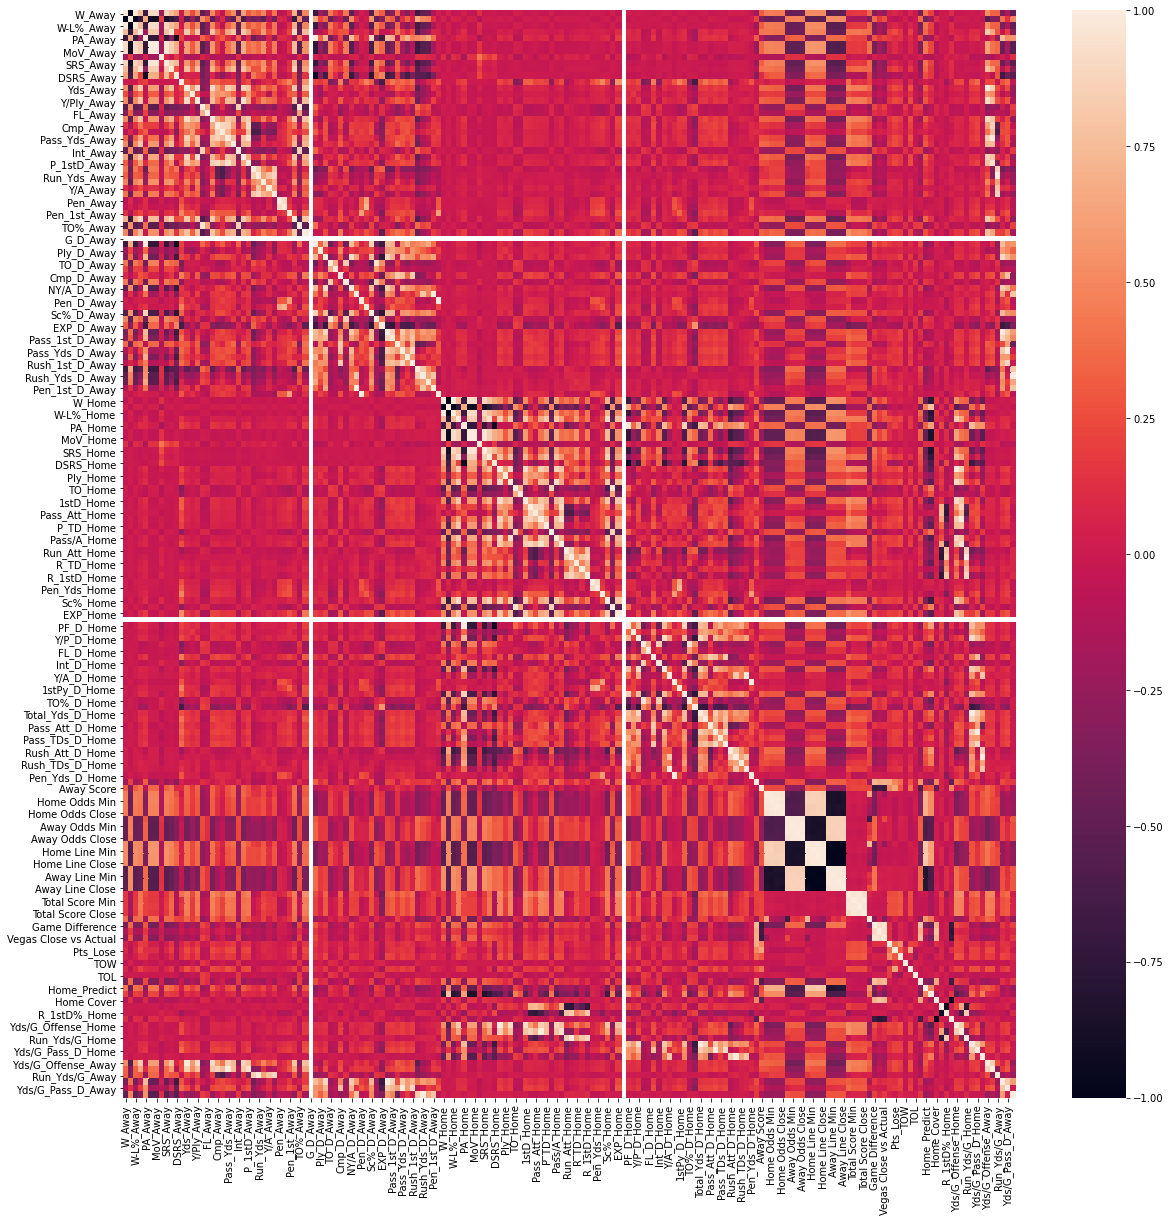

In [66]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr());

In [18]:
week = pd.read_csv('Week_by_week.csv')
week.head()

,Unnamed: 0,Week,Day,Date,Time,Winner/tie,Loser/tie,Pts_Win,Pts_Lose,YdsW,TOW,YdsL,TOL,Year
0,0,1,Thu,2006-09-07,08:37:00,Pittsburgh Steelers,Miami Dolphins,28,17,342,1,278,2,2006
1,1,1,Sun,2006-09-10,01:00:00,Cincinnati Bengals,Kansas City Chiefs,23,10,236,1,289,3,2006
2,2,1,Sun,2006-09-10,01:01:00,Baltimore Ravens,Tampa Bay Buccaneers,27,0,271,0,142,3,2006
3,3,1,Sun,2006-09-10,01:02:00,New England Patriots,Buffalo Bills,19,17,319,2,240,0,2006
4,4,1,Sun,2006-09-10,01:02:00,St. Louis Rams,Denver Broncos,18,10,320,0,259,5,2006


Let's calcualate what the home field advantage is. First, I'm going to take our winner column and divide it by the total amount of games played. 

In [67]:
df['Home Winner'].value_counts()

1    2242
0    1747
Name: Home Winner, dtype: int64

In [68]:
df['Home Winner'].value_counts()/len(df['Winner'])

1    0.562046
0    0.437954
Name: Home Winner, dtype: float64

So according to this, the home team wins 56% of the time! That's impressive. Does that mean we should bet that team everytime? For the sake of consistency, all our results will be computed Home Score minus the Away Score. That means if a Away team wins by 7, the "Game Difference" would be -7. Let's see what that would look like.

,Game Difference
count,3989.000000
mean,2.096515
std,14.804238
min,-49.000000
25%,-7.000000
50%,3.000000
75%,10.000000
max,59.000000


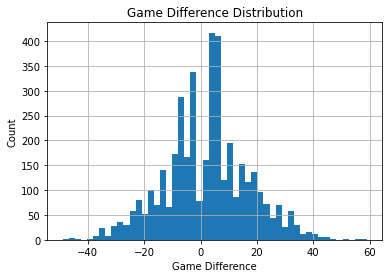

In [69]:
ax = df['Game Difference'].hist(bins=50)
ax.set_ylabel('Count')
ax.set_xlabel('Game Difference')
ax.set_title('Game Difference Distribution')
pd.DataFrame(df['Game Difference'].describe())

,Away Line Open
count,1854.000000
mean,2.257551
std,5.681427
min,-16.500000
25%,-2.500000
50%,3.000000
75%,6.500000
max,20.500000


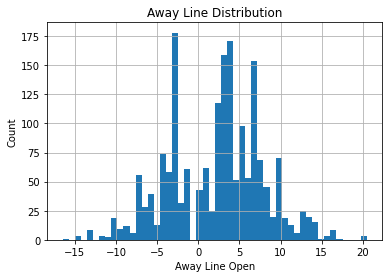

In [205]:
ax = df['Away Line Open'].hist(bins=50)
ax.set_ylabel('Count')
ax.set_xlabel('Away Line Open')
ax.set_title('Away Line Distribution')
pd.DataFrame(df['Away Line Open'].describe())

,Away Line Close
count,1854.000000
mean,2.040183
std,5.865016
min,-18.000000
25%,-3.000000
50%,3.000000
75%,6.000000
max,21.500000


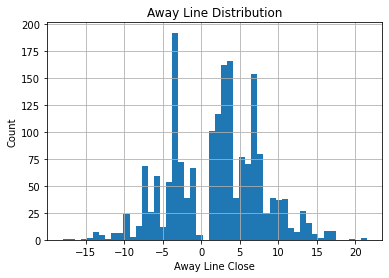

In [206]:
ax = df['Away Line Close'].hist(bins=50)
ax.set_ylabel('Count')
ax.set_xlabel('Away Line Close')
ax.set_title('Away Line Distribution')
pd.DataFrame(df['Away Line Close'].describe())

Fairly normal with a mean only slightly higher than 2. Does this mean it's a good idea to take 3 points with an away team? As Home teams win on average 5 out of every 9 games, is the market not aware that these home teams are barely winning?

In [207]:
df['Game Difference'].value_counts()/len(df['Game Difference'])

 3.0     0.079970
-3.0     0.064176
 7.0     0.049887
-7.0     0.043119
 10.0    0.035097
           ...   
 55.0    0.000251
 52.0    0.000251
 48.0    0.000251
 58.0    0.000251
-39.0    0.000251
Name: Game Difference, Length: 93, dtype: float64

In [125]:
(df['Game Difference'] <= int(25)).value_counts(normalize = True)

True     0.935322
False    0.064678
Name: Game Difference, dtype: float64

In [126]:
(df['Game Difference'] >= int(-25)).value_counts(normalize= True)

True     0.965154
False    0.034846
Name: Game Difference, dtype: float64

It looks like we have blowouts almost twice as likely from the home team compared to the away team - does this give people more of incentive to bet on these home teams?

In [208]:
no_outliers = df.loc[(df['Game Difference'] <= int(25)) & (df['Game Difference'] >= int(-25))]

In [209]:
no_outliers['Game Difference'].value_counts()/len(no_outliers['Game Difference'])

 3.0     0.088808
-3.0     0.071269
 7.0     0.055401
-7.0     0.047884
 10.0    0.038976
 6.0     0.037027
 14.0    0.033408
-6.0     0.032016
-4.0     0.028675
 4.0     0.027283
-14.0    0.023664
 1.0     0.023664
-2.0     0.022829
 8.0     0.022550
-10.0    0.021993
 5.0     0.021715
 2.0     0.021158
 21.0    0.020323
-1.0     0.019766
-8.0     0.019209
 17.0    0.018931
-5.0     0.017539
-17.0    0.016425
-13.0    0.015590
 20.0    0.015312
 18.0    0.015033
 11.0    0.015033
 24.0    0.013641
 16.0    0.013641
 13.0    0.013363
-21.0    0.012806
-11.0    0.012249
-18.0    0.011414
-24.0    0.011414
-16.0    0.011414
 9.0     0.010857
 12.0    0.010579
-20.0    0.009465
 15.0    0.008909
-15.0    0.008073
 19.0    0.007517
-9.0     0.006682
 22.0    0.006403
 25.0    0.006403
 23.0    0.006403
-12.0    0.006125
-25.0    0.005011
-23.0    0.005011
-19.0    0.004733
-22.0    0.004454
 0.0     0.001949
Name: Game Difference, dtype: float64

In [210]:
len(no_outliers)/ len(df)

0.9004763098520933

Here, we have 90% of our data accounted for. Lets see how the statistics would change!

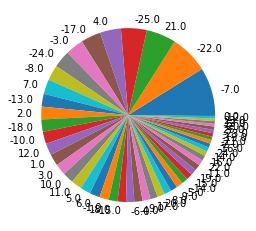

In [112]:
y = no_outliers['Game Difference'].value_counts()/len(no_outliers['Game Difference'])
labels = no_outliers['Game Difference'].unique()

plt.pie(y, labels = labels)
plt.show()

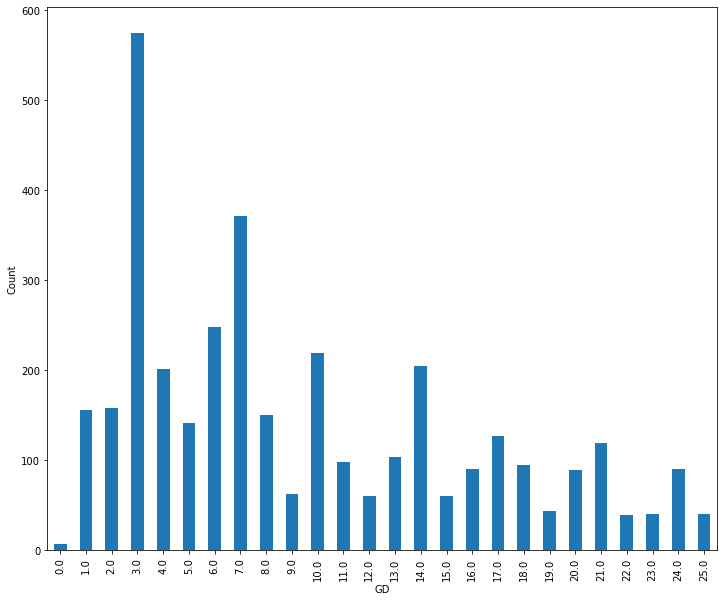

In [242]:
no_outliers['GD'] = no_outliers['Game Difference'].abs()
no_outliers.groupby(['GD' ])['GD'].count().plot(kind='bar').set_ylabel('Count')
plt.rcParams["figure.figsize"] = (12,10)

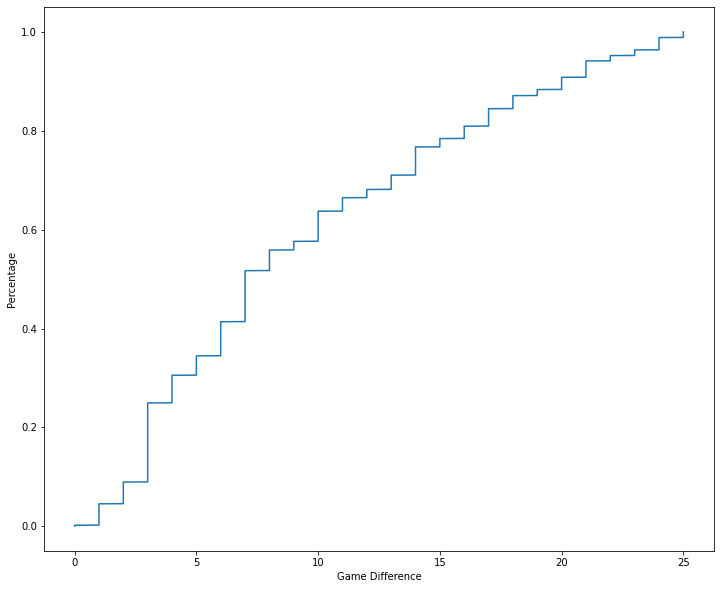

In [245]:
x = no_outliers['GD']
x_plt, y_plt = ecdf(x)
plt.plot(x_plt, y_plt, label ='Game Difference')
plt.xlabel('Game Difference')
plt.ylabel('Percentage')
plt.show()


In [ ]:

no_outliers.groupby(['Game Difference' ])['Game Difference'].count().plot(kind='bar').set_ylabel('Count')
plt.rcParams["figure.figsize"] = (20,30)

Let's print a couple of histograms one on top of another to see how the actual scores are vs the lines that Vegas is posting.

In [137]:
no_outliers['Game Difference'].describe()

count    3592.000000
mean        1.223552
std        11.507525
min       -25.000000
25%        -7.000000
50%         3.000000
75%         9.000000
max        25.000000
Name: Game Difference, dtype: float64

Ok, so it looks like that 10% of games that are blowouts raise our average score by almost a full point (0.8). Is this significant?

In [217]:
pd.DataFrame(df['Away Line Open'].describe())

,Away Line Open
count,1854.000000
mean,2.257551
std,5.681427
min,-16.500000
25%,-2.500000
50%,3.000000
75%,6.500000
max,20.500000


Is there a way to prove that this 1 point difference, a single point, is statistically significant? Let's see what % of total games fall as a 2 point difference (because if the line was, say 2.5, and a home team won by 1, like the average Game Difference over time, then that 1 or 2 point victory would be enough to cover).


In [220]:
Close_Home_Victory = no_outliers.loc[(no_outliers['Game Difference'] == 2)]
print(len(Close_Home_Victory)/ len(no_outliers))

0.021158129175946547


So, looks like it only happens in 2% of games - not very convincing! What about more of a range, say, Home Team wins by 1 or 2?

In [221]:
Close_Home_Victory = no_outliers.loc[(no_outliers['Game Difference'] == 2)| (no_outliers['Game Difference'] == 1)]
print(len(Close_Home_Victory)/ len(no_outliers))

0.04482182628062361


In [224]:
Close_Home_Victory = no_outliers.loc[(no_outliers['Game Difference'] >= 1) & (no_outliers['Game Difference'] <= 3)]
print(len(Close_Home_Victory)/ len(no_outliers))

0.133630289532294


Well, happening nearly 13% of the time does seem promising!

,Away Line Open
count,1682.000000
mean,2.228894
std,5.565300
min,-16.500000
25%,-2.500000
50%,3.000000
75%,6.000000
max,20.500000


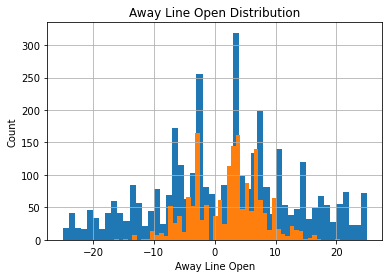

In [215]:
ax = no_outliers['Game Difference'].hist(bins=50)
ax.set_ylabel('Count')
ax.set_xlabel('Game Difference')
ax.set_title('Game Difference Distribution')



ax = no_outliers['Away Line Open'].hist(bins=50)
ax.set_ylabel('Count')
ax.set_xlabel('Away Line Open')
ax.set_title('Away Line Open Distribution')
pd.DataFrame(no_outliers['Away Line Open'].describe())


Hmm so it looks like the game difference and the difference between the Away Lines, at least for opening, are about a full point! Next, let's see hopw often we can expect our away teams to cover!

In [226]:
np.sum(no_outliers['Away Cover'])/len(no_outliers['Away Cover'])

0.5476057906458798

Wooh! We might be onto something here. Just for comparison sake let's compare that to the full dataset to see if there's a big difference.

In [140]:
np.sum(df['Away Cover'])/len(df['Away Cover'])

0.527951867635999

In [227]:
np.sum(df['Home Cover'])/len(df['Home Cover'])

0.472048132364001

Well, there is a difference, but as we know, the as long as we are going over 52% we should be alright in terms of long term profit. Let's get some linear regression going to see if there's a point spread that's more profitable than others. 

In [204]:
Away_Dogs = no_outliers.loc[(no_outliers['Away Line Open'] >= int(1.0))]
np.sum(Away_Dogs['Away Cover'])/len(Away_Dogs['Away Cover'])

0.57116953762466

In [202]:
High_Away_Lines = no_outliers.loc[(no_outliers['Away Line Open'] >= int(10)) & (no_outliers['Away Line Open'] < int(14.5))]
print(np.sum(High_Away_Lines['Away Cover'])/ len(High_Away_Lines), (len(High_Away_Lines)/len(df)))

0.591304347826087 0.028829280521433943


In [203]:
High_Away_Lines = no_outliers.loc[(no_outliers['Away Line Open'] >= int(7)) & (no_outliers['Away Line Open'] <= int(9.5))]
print(np.sum(High_Away_Lines['Away Cover'])/ len(High_Away_Lines), (len(High_Away_Lines)/len(df)))

0.6218905472636815 0.050388568563549764


Wow now we are cooking with gas! At 61%, we would really be racking in some $. Let's see if there's a way to visualize this % on a continuous regression line.

In [196]:
High_Away_Lines = no_outliers.loc[(no_outliers['Away Line Open'] > int(3)) & (no_outliers['Away Line Open'] < int(7))]
print(np.sum(High_Away_Lines['Away Cover'])/ len(High_Away_Lines), (len(High_Away_Lines)/len(df)))

0.5527638190954773 0.0997743795437453


In [195]:
High_Away_Lines = no_outliers.loc[(no_outliers['Away Line Open'] >= int(1)) & (no_outliers['Away Line Open'] <= int(3))]
print(np.sum(High_Away_Lines['Away Cover'])/ len(High_Away_Lines), (len(High_Away_Lines)/len(df)))

0.5436046511627907 0.08623715216846327


A lot to take in! Looks like any point over the spread of 1 an away team will be more likely to cover than not. Could it be because of the differecne between The Vegas Line Mean of

In [250]:
no_outliers[no_outliers['Away Cover'] == 0]['Away Line Open']


2       NaN
4       NaN
10      NaN
14      NaN
22      NaN
       ... 
3978    3.5
3979    1.0
3984   -2.0
3985    9.5
3986    3.0
Name: Away Line Open, Length: 1625, dtype: float64

In [253]:
from scipy import stats

rvs1 = no_outliers[no_outliers['Home Cover'] == 0]['Home Line Open']
rvs2 = no_outliers[no_outliers['Home Cover'] == 1]['Home Line Open']
stats.ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=-6.966515288789569, pvalue=3.847887210639076e-12)

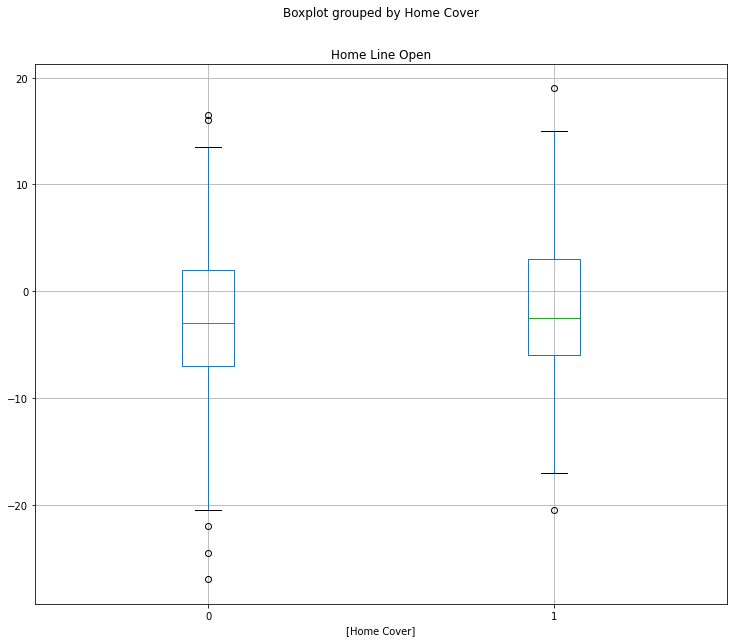

,count,mean,std,min,25%,50%,75%,max
Home Cover,,,,,,,,
0,1967.0,-2.930097,5.689630,-27.0,-7.0,-3.0,2.0,16.5
1,1625.0,-1.576923,5.918467,-20.5,-6.0,-2.5,3.0,19.0


In [259]:
no_outliers.boxplot(column=['Home Line Open'],by = ['Home Cover'])
plt.show()

pd.DataFrame(no_outliers.groupby( ['Home Cover'])['Home Line Open'].describe())

Well there we go! The difference is statistically significant that the line Vegas sets does have an impact on the game. Does that mean teams perform better/ worse for a certain Vegas projection? I don't believe so. It seems that the % of bets favor those teams that are viewed as being better. 

Now, let's see what the away difference is, and whether that set line was accurate more times than not.

In [262]:
remove_NAN_Away = no_outliers.dropna()
df = remove_NAN_Away

In [263]:
rvs1 = df[df['Away Cover'] == 0]['Away Line Open']
rvs2 = df[df['Away Cover'] == 1]['Away Line Open']
stats.ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=-3.426269454061171, pvalue=0.0006266766690280445)

In [267]:
rvs1 = df[df['Away Cover'] == 0]['Away Line Close']
rvs2 = df[df['Away Cover'] == 1]['Away Line Close']
stats.ttest_ind(rvs1,rvs2, equal_var= False, nan_policy= 'propagate')

Ttest_indResult(statistic=-2.2408833086403335, pvalue=0.02517018329251166)

So measuring the away line, you can see there's an increase between how much our sample could be due to random. Although the number of 0.025 isn't high, it is 2 decimal points, or almost 100 times our Open p-value. 

In [164]:
np.sum(Away_Dogs['Away Cover'])/len(Away_Dogs['Away Cover'])

0.57116953762466

Well, ok then! It seems like if we bet any underdog, we will be profitable in the long run. This is nuts! Is it really that simple? Let's do some plotting and see if there's trends we can look to for this.

How can we create bins for these to go in so we can visualize the data better?

(array([0.07996838, 0.1060046 , 0.22316758, 0.10507474, 0.08182811,
        0.09391636, 0.13483042, 0.03812446, 0.03068554, 0.05951136,
        0.00836878, 0.01301811, 0.02603622, 0.01208824, 0.00185973,
        0.00836878, 0.00092986, 0.        , 0.        , 0.00185973]),
 array([ 1.   ,  1.975,  2.95 ,  3.925,  4.9  ,  5.875,  6.85 ,  7.825,
         8.8  ,  9.775, 10.75 , 11.725, 12.7  , 13.675, 14.65 , 15.625,
        16.6  , 17.575, 18.55 , 19.525, 20.5  ]),
 <BarContainer object of 20 artists>)

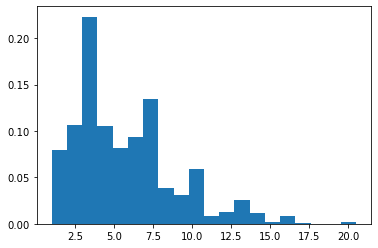

In [183]:
plt.hist(Away_Dogs['Away Line Open'], bins = 20, density =True)

(array([ 48., 235., 162.,  81.,  98., 140.,  87.,  31.,  65.,  17.,   9.,
         14.,  28.,  13.,   2.,   9.,   1.,   0.,   0.,   2.]),
 array([ 1.5 ,  2.45,  3.4 ,  4.35,  5.3 ,  6.25,  7.2 ,  8.15,  9.1 ,
        10.05, 11.  , 11.95, 12.9 , 13.85, 14.8 , 15.75, 16.7 , 17.65,
        18.6 , 19.55, 20.5 ]),
 <BarContainer object of 20 artists>)

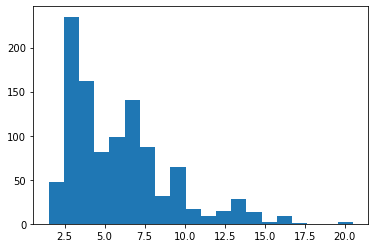

In [161]:
plt.hist(Away_Dogs['Away Line Open'], bins = 20)

(array([  1.,   2.,  12.,  25.,   1.,  74., 301.,  91., 133., 186.,  58.,
         53.,  40.,  19.,  29.,   3.,  12.,   0.,   0.,   2.]),
 array([-6.   , -4.625, -3.25 , -1.875, -0.5  ,  0.875,  2.25 ,  3.625,
         5.   ,  6.375,  7.75 ,  9.125, 10.5  , 11.875, 13.25 , 14.625,
        16.   , 17.375, 18.75 , 20.125, 21.5  ]),
 <BarContainer object of 20 artists>)

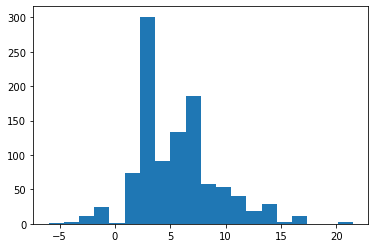

In [162]:
plt.hist(Away_Dogs['Away Line Close'], bins = 20)

In [240]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

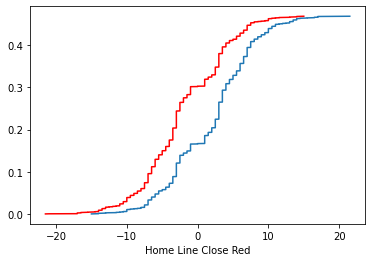

In [168]:
x = no_outliers['Away Line Close']
x_plt, y_plt = ecdf(x)
plt.plot(x_plt, y_plt, label ='Away Line Close')


x = no_outliers['Home Line Close']
x_plt, y_plt = ecdf(x)
plt.plot(x_plt, y_plt, linestyle = None, color = 'red')
plt.xlabel('Home Line Close Red')
plt.show()


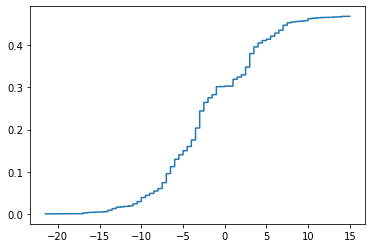

In [155]:
x = no_outliers['Home Line Close']
x_plt, y_plt = ecdf(x)
plt.plot(x_plt, y_plt, linestyle = None)
plt.show()


We have to figure out if ther's any other factors other than Home Favroites being over valued by the public. Is there acutal numbers we can look to that away teams do to facilitate this?
